# Clean the data

Import libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

## Import and check the data

Import the mental_health_dataset_raw.csv file in to a pandas dataframe:

In [2]:
# load raw dataset
df_raw = pd.read_csv("../data_files/mental_health_dataset_raw.csv")

View the first 10 rows of the file:

In [3]:
# display first 10 rows of the dataset
df_raw.head(10)

,sleep_hours,screen_time,exercise_minutes,daily_pending_tasks,interruptions,fatigue_level,social_hours,coffee_cups,diet_quality,weather,mood_score,stress_level
0,7.745071,3.649643,13.272466,1,5,4.179955,2.448854,1,average,snowy,9.171062,1.000000
1,6.792604,4.710963,1.785436,3,6,4.883679,1.330623,3,good,sunny,5.706491,3.558516
2,7.971533,3.415160,71.843325,4,10,4.207812,2.134120,0,poor,cloudy,10.000000,2.971450
3,9.284545,4.384077,14.596656,2,4,3.362592,1.857070,0,good,sunny,8.385038,1.000000
4,6.648770,1.212771,19.048010,3,5,6.229107,2.642980,1,poor,rainy,10.000000,1.639047
5,6.648795,5.426587,5.399719,3,3,4.702907,2.141541,0,poor,cloudy,5.916326,1.032066
6,9.368819,5.002411,13.213526,3,3,4.821121,2.286157,1,average,sunny,8.374238,1.000000
7,8.151152,3.365823,11.212558,2,8,0.000000,0.974128,1,good,sunny,9.375238,1.000000
8,6.295788,6.318491,1.556979,3,3,4.547024,0.721868,0,average,snowy,4.838739,1.573465
9,7.813840,6.875140,2.244578,1,7,2.846783,2.070628,2,average,rainy,6.447029,1.000000


Check the shape of the dataframe:

In [4]:
df_raw.shape

(2000, 12)

Check summary of inital raw data:

In [5]:
before_summary = pd.DataFrame({
    "dtype": df_raw.dtypes,
    "missing_values": df_raw.isnull().sum(),
    "non_missing": df_raw.notnull().sum(),
    "unique_values": df_raw.nunique()
})
before_summary

,dtype,missing_values,non_missing,unique_values
sleep_hours,float64,0,2000,2000
screen_time,float64,0,2000,1989
exercise_minutes,float64,0,2000,2000
daily_pending_tasks,int64,0,2000,11
interruptions,int64,0,2000,16
fatigue_level,float64,0,2000,1983
social_hours,float64,0,2000,1966
coffee_cups,int64,0,2000,7
diet_quality,str,0,2000,3
weather,str,0,2000,4


There are no missing values, so no need to handle any missing data and all the columns have lower snake case names so no need to rename any columns.

Check for duplciates:

In [6]:
df_raw.duplicated().sum()

np.int64(0)

There are no duplciates to remove.

---

## Look at each column and assign data types

Go through each of the columns and set the data types, drop or add new columns if required.

First I will make a copy of the raw dataframe to make changes to:

In [7]:
df = df_raw.copy()

diet_quality unique values:

In [8]:
df['diet_quality'].value_counts()

diet_quality
average    998
good       597
poor       405
Name: count, dtype: int64

set ordered category values for diet_quality:

In [9]:
# Define ordered categorical type for diet quality
diet_quality_order = ["poor", "average", "good"]


# Convert diet quality column to ordered categorical type
df["diet_quality"] = pd.Categorical(df["diet_quality"], 
                                   categories=diet_quality_order, 
                                   ordered=True)

Check the unique values of weather:

In [10]:
# display the unique weather values
df["weather"].unique()

<ArrowStringArray>
['snowy', 'sunny', 'cloudy', 'rainy']
Length: 4, dtype: str

Set weather column as a category column:

In [11]:
# Convert weather column to categorical type
df["weather"] = df["weather"].astype("category")

### Look at other numerical columns

In [12]:
# Display summary statistics for the other numerical columns (transposed for readability)
df.describe(include=["int64", "float64"]).T

,count,mean,std,min,25%,50%,75%,max
sleep_hours,2000.0,7.067237,1.481299,2.138099,6.066007,7.067037,8.024466,12.000000
screen_time,2000.0,4.990009,2.002973,0.000000,3.581748,4.999893,6.331087,12.852475
exercise_minutes,2000.0,19.868516,20.071066,0.004821,5.580022,13.289737,28.118005,150.504069
daily_pending_tasks,2000.0,2.948500,1.725206,0.000000,2.000000,3.000000,4.000000,10.000000
interruptions,2000.0,5.131000,2.278472,0.000000,3.000000,5.000000,7.000000,15.000000
fatigue_level,2000.0,4.996769,2.000430,0.000000,3.647335,4.956565,6.320355,10.000000
social_hours,2000.0,2.001369,0.959934,0.000000,1.304384,1.996521,2.653096,5.505871
coffee_cups,2000.0,0.989500,1.012869,0.000000,0.000000,1.000000,2.000000,6.000000
mood_score,2000.0,7.741658,2.023962,1.493465,6.090860,7.846064,10.000000,10.000000
stress_level,2000.0,2.129647,1.482866,1.000000,1.000000,1.397094,2.932065,9.684702


---

## Data Distributions

This section is to look at the data distributions.

### Numerical fields - Histograms and KDE

Create a function to use Freedman–Diaconis rule to calculate the number of bins:

This is useful as it adapts to the data spread and is robust against outliers

In [13]:
def calculate_bins(df, col):
    '''
    Calculate the number of bins for a histogram using the Freedman-Diaconis rule.

    Parameters:
    - df: Pandas DataFrame containing the data.
    - col: String name of the column to calculate the number of bins for.

    Returns:
    - Integer number of bins.
    '''

    # Calculate interquartile range
    q25, q75 = df[col].quantile(0.25), df[col].quantile(0.75)
    iqr = q75 - q25

    # Calculate bin width using Freedman-Diaconis rule
    bin_width = 2 * iqr * (len(df[col]) ** (-1/3))

    # Calculate number of bins by dividing the range by the bin width
    return int((df[col].max() - df[col].min()) / bin_width)

Create function for creating a single histogram/kde chart:

In [14]:
def plot_histogram_kde(axes, df, col, title, bins, kde=True):
    '''
    Plots a histogram with KDE overlay for a specified column in the dataframe.
    Plots vertical lines for mean and one standard deviation above and below the mean.

    Parameters:
    - axes: Matplotlib Axes object where the plot will be drawn.
    - df: Pandas DataFrame containing the data.
    - col: String name of the column to plot.
    - title: String title for the plot.
    - bins: Integer number of bins for the histogram or list of bin edges.
    - kde: Boolean indicating whether to plot the KDE overlay (default is True).
    Returns:
    - None
    '''

    # Plot histogram with KDE
    sns.histplot(data=df, x=col, kde=kde, bins=bins, color="skyblue", ax=axes)

    # Set plot title and labels
    axes.set_title(title)
    axes.set_xlabel(col.replace("_", " ").title())
    axes.set_ylabel("Frequency")
    
    # Plot vertical line for mean
    axes.axvline(df[col].mean(), color='r', linestyle='dashed', linewidth=2)
    axes.text(x=df[col].mean() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.90, s='Mean', fontsize=15, c='r')

    # Plot vertical line for one standard deviation above the mean
    axes.axvline(df[col].mean() + df[col].std(), color='g', linestyle='dashed', linewidth=2)
    axes.text(x=df[col].mean() + df[col].std() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.75, s='+1σ', fontsize=15, c='g')
    
    # Plot vertical line for one standard deviation below the mean
    axes.axvline(df[col].mean() - df[col].std(), color='g', linestyle='dashed', linewidth=2)
    axes.text(x=df[col].mean() - df[col].std() + df[col].std()/8 , y=axes.get_ylim()[1] * 0.75, s='-1σ', fontsize=15, c='g')

Create the 5x2 chart:

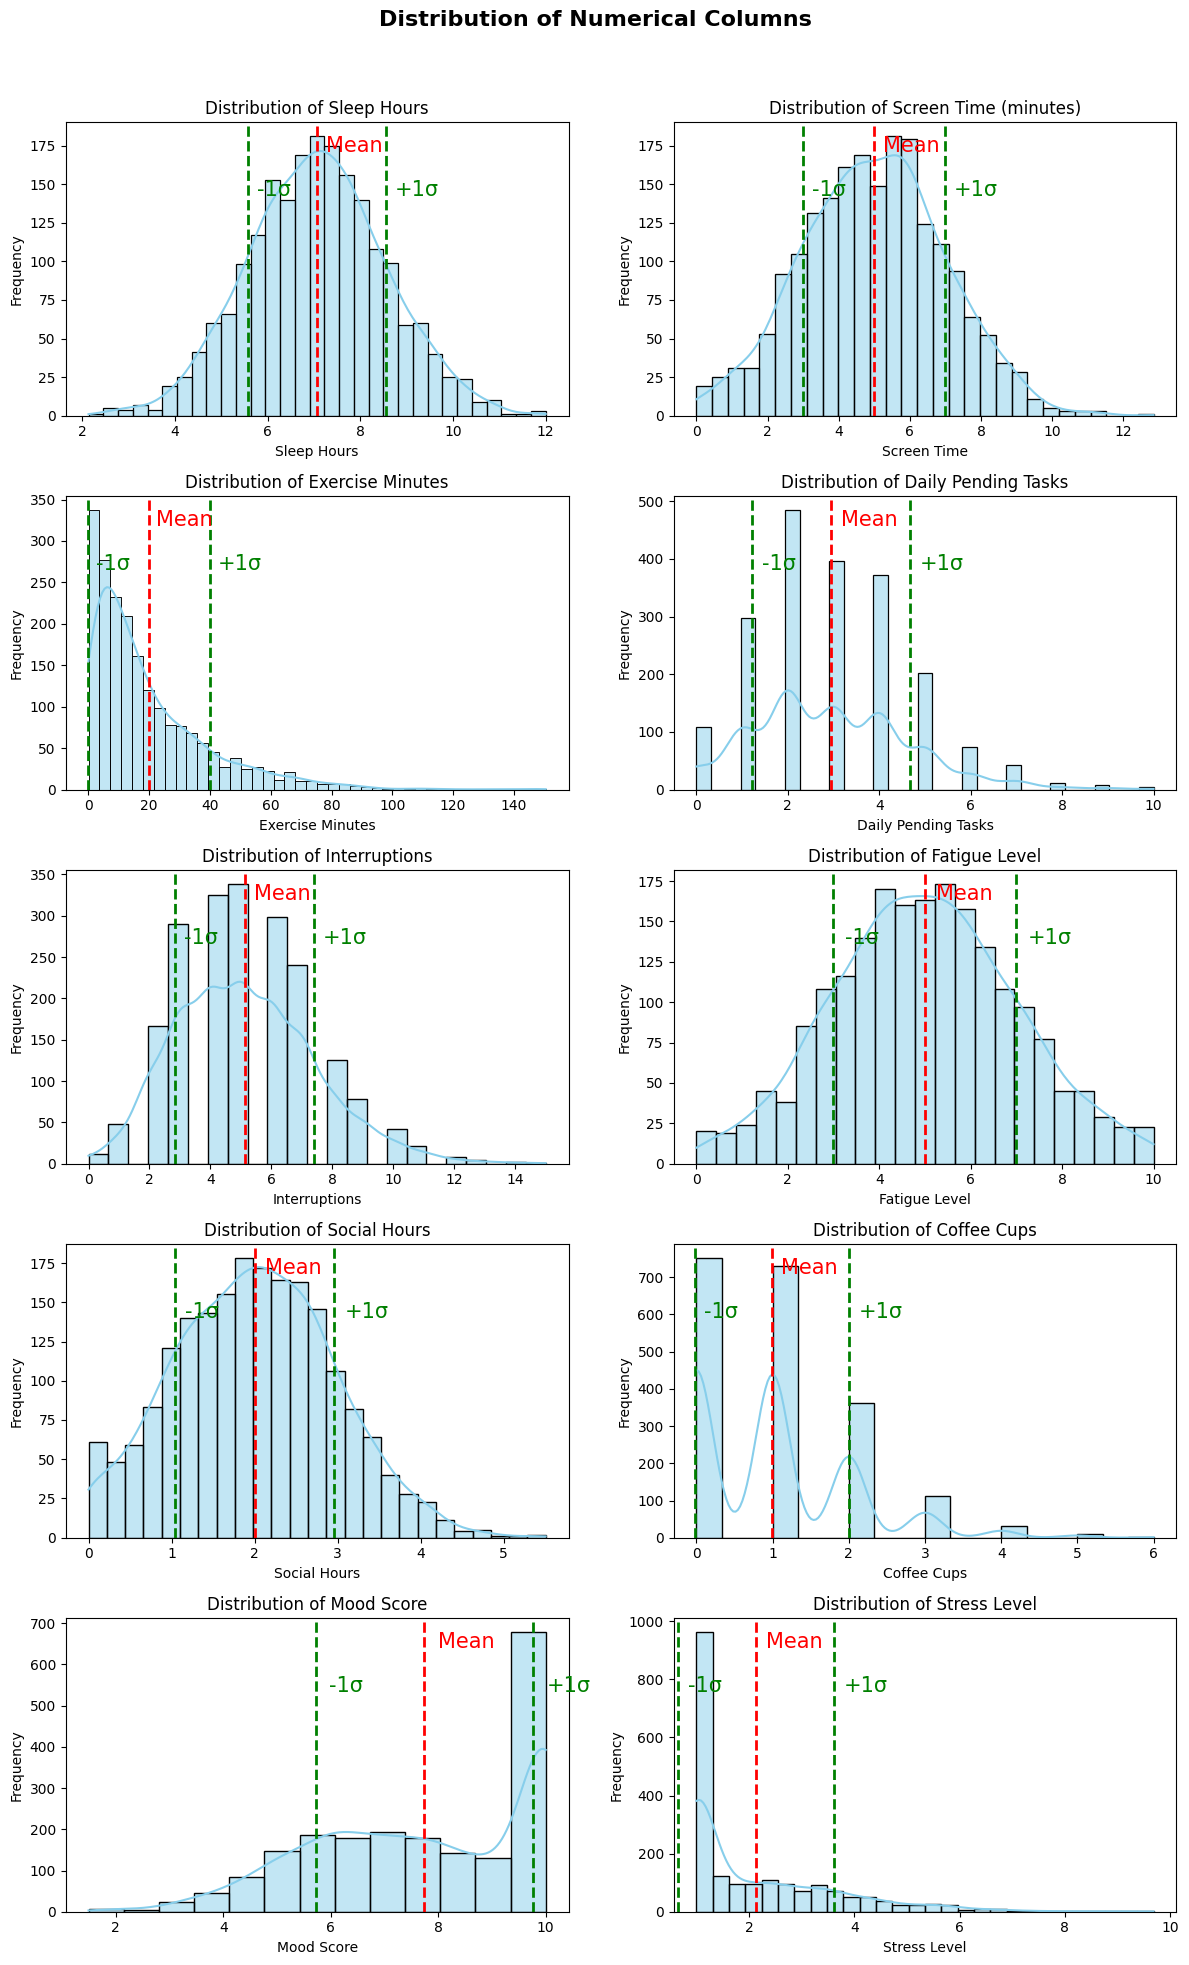

In [15]:
# Create subplots
fig, axs = plt.subplots(5, 2, figsize=(12, 20))

# Add histogram plots
plot_histogram_kde(axs[0, 0], df, 'sleep_hours', 'Distribution of Sleep Hours', calculate_bins(df, 'sleep_hours'))
plot_histogram_kde(axs[0, 1], df, 'screen_time', 'Distribution of Screen Time (minutes)', calculate_bins(df, 'screen_time'))
plot_histogram_kde(axs[1, 0], df, 'exercise_minutes', 'Distribution of Exercise Minutes', calculate_bins(df, 'exercise_minutes'))
plot_histogram_kde(axs[1, 1], df, 'daily_pending_tasks', 'Distribution of Daily Pending Tasks', calculate_bins(df, 'daily_pending_tasks'))
plot_histogram_kde(axs[2, 0], df, 'interruptions', 'Distribution of Interruptions', calculate_bins(df, 'interruptions'))
plot_histogram_kde(axs[2, 1], df, 'fatigue_level', 'Distribution of Fatigue Level', calculate_bins(df, 'fatigue_level'))
plot_histogram_kde(axs[3, 0], df, 'social_hours', 'Distribution of Social Hours', calculate_bins(df, 'social_hours'))
plot_histogram_kde(axs[3, 1], df, 'coffee_cups', 'Distribution of Coffee Cups', calculate_bins(df, 'coffee_cups'))
plot_histogram_kde(axs[4, 0], df, 'mood_score', 'Distribution of Mood Score', calculate_bins(df, 'mood_score'))
plot_histogram_kde(axs[4, 1], df, 'stress_level', 'Distribution of Stress Level', calculate_bins(df, 'stress_level'))

# Add overall title
fig.suptitle('Distribution of Numerical Columns', fontsize=16, fontweight='bold')

# Adjust spacing for suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save figure and show
plt.savefig('../charts/distribution_of_numerical_columns_histogram.png')
plt.show()

### Numerical field Violin & Box plots

Create a function that creates the individual violin and box plots:

In [16]:
def plot_violin_box(axes, df, col, title):
    '''
    Plots a violin plot with box plot overlay for a specified column in the dataframe.

    Parameters:
    - axes: Matplotlib Axes object where the plot will be drawn.
    - df: Pandas DataFrame containing the data.
    - col: String name of the column to plot.
    - title: String title for the plot.
    Returns:
    - None
    '''

    # Violin
    sns.violinplot(
        data=df,
        x=col,
        color="lightgreen",
        inner=None,
        ax=axes
    )
    
    # Boxplot overlay
    sns.boxplot(
        data=df,
        x=col,
        width=0.15,
        boxprops={"facecolor": "white", "edgecolor": "black", "linewidth": 1.5},
        whiskerprops={"linewidth": 1.5},
        capprops={"linewidth": 1.5},
        medianprops={"color": "red", "linewidth": 2},
        showcaps=True,
        showfliers=True,
        ax=axes
    )

    axes.set_title(title)
    axes.set_xlabel(col.replace("_", " ").title())
    axes.set_ylabel("Distribution")

Create a 5x2 chart:

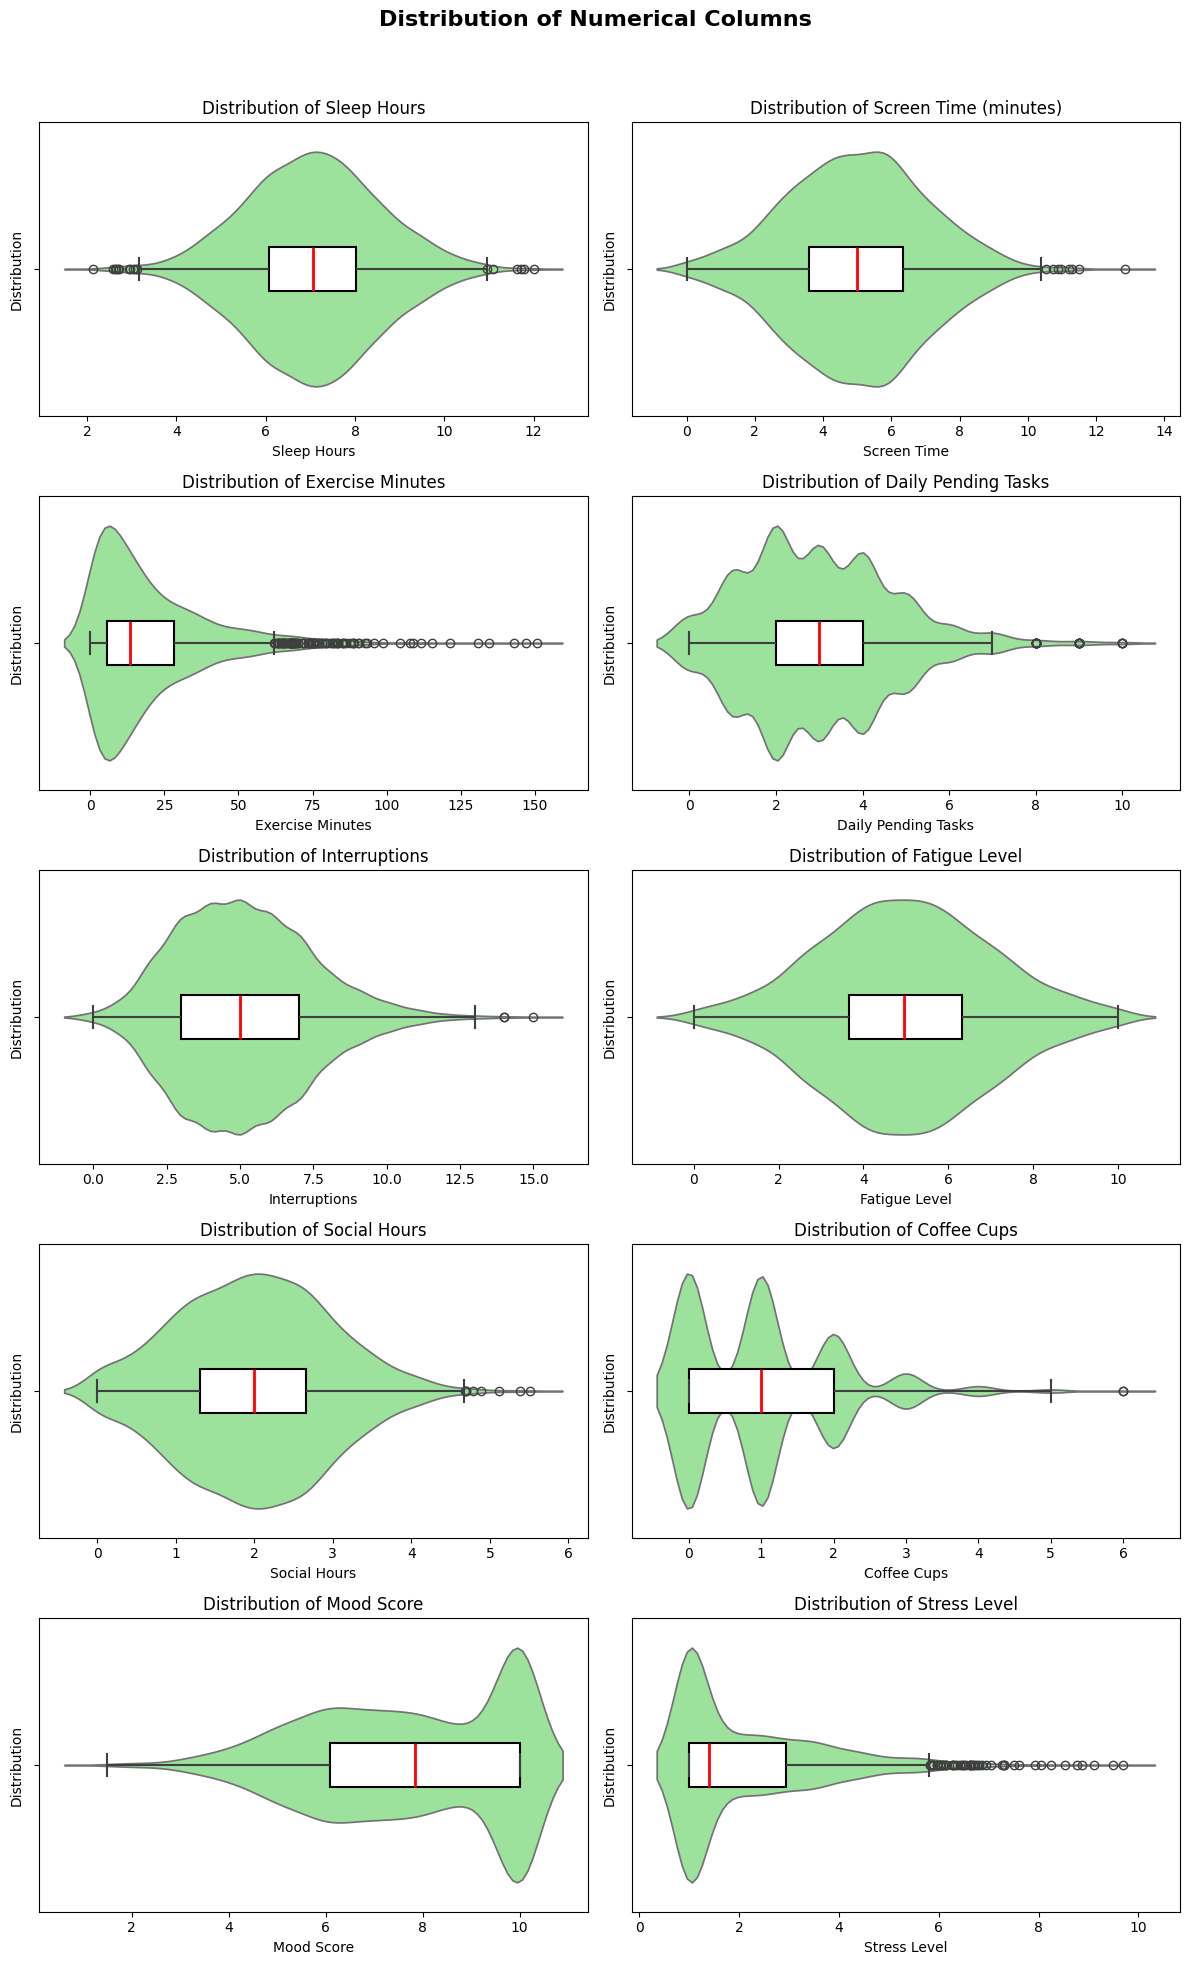

In [17]:
# Create subplots
fig, axs = plt.subplots(5, 2, figsize=(12, 20))

# Add violin and box plots
plot_violin_box(axs[0, 0], df, 'sleep_hours', 'Distribution of Sleep Hours')
plot_violin_box(axs[0, 1], df, 'screen_time', 'Distribution of Screen Time (minutes)')
plot_violin_box(axs[1, 0], df, 'exercise_minutes', 'Distribution of Exercise Minutes')
plot_violin_box(axs[1, 1], df, 'daily_pending_tasks', 'Distribution of Daily Pending Tasks')
plot_violin_box(axs[2, 0], df, 'interruptions', 'Distribution of Interruptions')
plot_violin_box(axs[2, 1], df, 'fatigue_level', 'Distribution of Fatigue Level')
plot_violin_box(axs[3, 0], df, 'social_hours', 'Distribution of Social Hours')
plot_violin_box(axs[3, 1], df, 'coffee_cups', 'Distribution of Coffee Cups')
plot_violin_box(axs[4, 0], df, 'mood_score', 'Distribution of Mood Score')
plot_violin_box(axs[4, 1], df, 'stress_level', 'Distribution of Stress Level')

# Add overall title
fig.suptitle('Distribution of Numerical Columns', fontsize=16, fontweight='bold')

# Adjust spacing for suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save figure and show
plt.savefig('../charts/distribution_of_numerical_columns_violin_box_plots.png')
plt.show()

### Skewness, Kurtosis and describe

Skew and Kurtosis:

In [18]:
skew_kurt = pd.DataFrame({
    "skewness": df[["sleep_hours", "screen_time", "exercise_minutes", "daily_pending_tasks", "interruptions", "fatigue_level", "social_hours", "coffee_cups", "mood_score", "stress_level"]].skew(),
    "kurtosis": df[["sleep_hours", "screen_time", "exercise_minutes", "daily_pending_tasks", "interruptions", "fatigue_level", "social_hours", "coffee_cups", "mood_score", "stress_level"]].kurt()
})
skew_kurt

,skewness,kurtosis
sleep_hours,0.023545,0.016830
screen_time,0.053027,-0.108064
exercise_minutes,1.925061,5.178210
daily_pending_tasks,0.623209,0.570002
interruptions,0.501197,0.300042
fatigue_level,0.061239,-0.276535
social_hours,0.136094,-0.238623
coffee_cups,1.108192,1.439738
mood_score,-0.418943,-0.899037
stress_level,1.486576,2.091779


### Catagorical fields - bar count plots

Create function to create single bar count plot:

In [19]:
def plot_bar_count(axes, df, col, title, order):
    '''
    Plots a bar plot showing counts and percentages for each category in a specified column.

    Parameters:
        axes (matplotlib.axes.Axes): The axes on which to plot.
        df (pandas.DataFrame): The dataframe containing the data.
        col (str): The column name to plot.
        title (str): The title of the plot.
        order (list): The order of categories to display.
    Returns:
        None
    '''

    # Draw the bar plot
    sns.countplot(x=col, data=df, color="#b4f5a4", ax=axes, order=order)
    
    # Set labels
    axes.set_title(title)
    axes.set_ylabel("Count")
    axes.set_xlabel(col.replace("_", " ").title())
    
    # Calculate counts and percentages
    total = len(df)
    
    # Loop through bars
    for p in axes.patches:
        height = p.get_height()
        percentage = 100 * height / total
        axes.text(
            p.get_x() + p.get_width() / 2,   # x position (center of bar)
            height,                          # y position (top of bar)
            f"{percentage:.1f}%",            # label text
            ha="center", va="bottom",        # alignment
            fontsize=10
        )

Create 2 charts. 1 for weather and 1 for diet_quality:

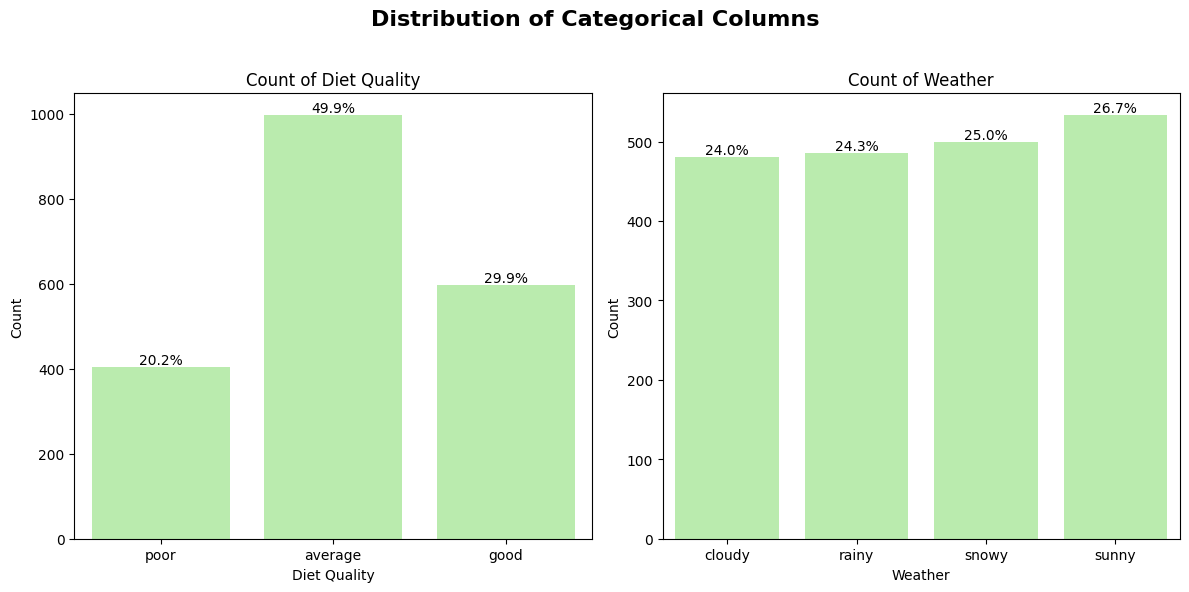

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Add charts
plot_bar_count(axs[0], df, 'diet_quality', 'Count of Diet Quality', df['diet_quality'].cat.categories)
plot_bar_count(axs[1], df, 'weather', 'Count of Weather', df['weather'].cat.categories)

# Add overall title
fig.suptitle('Distribution of Categorical Columns', fontsize=16, fontweight='bold')

# Adjust spacing for suptitle
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save figure and show
plt.savefig('../charts/distribution_of_categorical_columns_count_plots.png')
plt.show()

---

## Compare before and after summaries

Create an after summary:

In [21]:
after_summary = pd.DataFrame({
    "dtype": df.dtypes,
    "missing_values": df.isnull().sum(),
    "non_missing": df.notnull().sum(),
    "unique_values": df.nunique()
})

View before summary again:

In [22]:
before_summary

,dtype,missing_values,non_missing,unique_values
sleep_hours,float64,0,2000,2000
screen_time,float64,0,2000,1989
exercise_minutes,float64,0,2000,2000
daily_pending_tasks,int64,0,2000,11
interruptions,int64,0,2000,16
fatigue_level,float64,0,2000,1983
social_hours,float64,0,2000,1966
coffee_cups,int64,0,2000,7
diet_quality,str,0,2000,3
weather,str,0,2000,4


View after summary:

In [23]:
after_summary

,dtype,missing_values,non_missing,unique_values
sleep_hours,float64,0,2000,2000
screen_time,float64,0,2000,1989
exercise_minutes,float64,0,2000,2000
daily_pending_tasks,int64,0,2000,11
interruptions,int64,0,2000,16
fatigue_level,float64,0,2000,1983
social_hours,float64,0,2000,1966
coffee_cups,int64,0,2000,7
diet_quality,category,0,2000,3
weather,category,0,2000,4


---

## Look at correlations

Display the numerical correlation figures between all numerical fields:

In [25]:
corr = df.corr(numeric_only=True)
corr

,sleep_hours,screen_time,exercise_minutes,daily_pending_tasks,interruptions,fatigue_level,social_hours,coffee_cups,mood_score,stress_level
sleep_hours,1.000000,-0.018253,-0.044957,-0.020266,0.020075,0.019656,-0.028364,-0.010743,0.160510,-0.299987
screen_time,-0.018253,1.000000,0.033443,0.000687,-0.000746,-0.044424,0.009172,-0.021468,-0.287830,-0.001215
exercise_minutes,-0.044957,0.033443,1.000000,-0.006550,0.013778,0.022317,0.018532,0.016574,0.702350,0.011245
daily_pending_tasks,-0.020266,0.000687,-0.006550,1.000000,0.008208,0.006637,0.026906,-0.021208,-0.008746,0.798292
interruptions,0.020075,-0.000746,0.013778,0.008208,1.000000,-0.014940,0.001267,-0.008508,0.012302,0.284151
fatigue_level,0.019656,-0.044424,0.022317,0.006637,-0.014940,1.000000,0.029126,0.026313,-0.096589,0.077554
social_hours,-0.028364,0.009172,0.018532,0.026906,0.001267,0.029126,1.000000,-0.002541,0.028679,0.013869
coffee_cups,-0.010743,-0.021468,0.016574,-0.021208,-0.008508,0.026313,-0.002541,1.000000,0.010891,0.063265
mood_score,0.160510,-0.287830,0.702350,-0.008746,0.012302,-0.096589,0.028679,0.010891,1.000000,-0.065135
stress_level,-0.299987,-0.001215,0.011245,0.798292,0.284151,0.077554,0.013869,0.063265,-0.065135,1.000000


Create a heatmap to visually show the correlation:

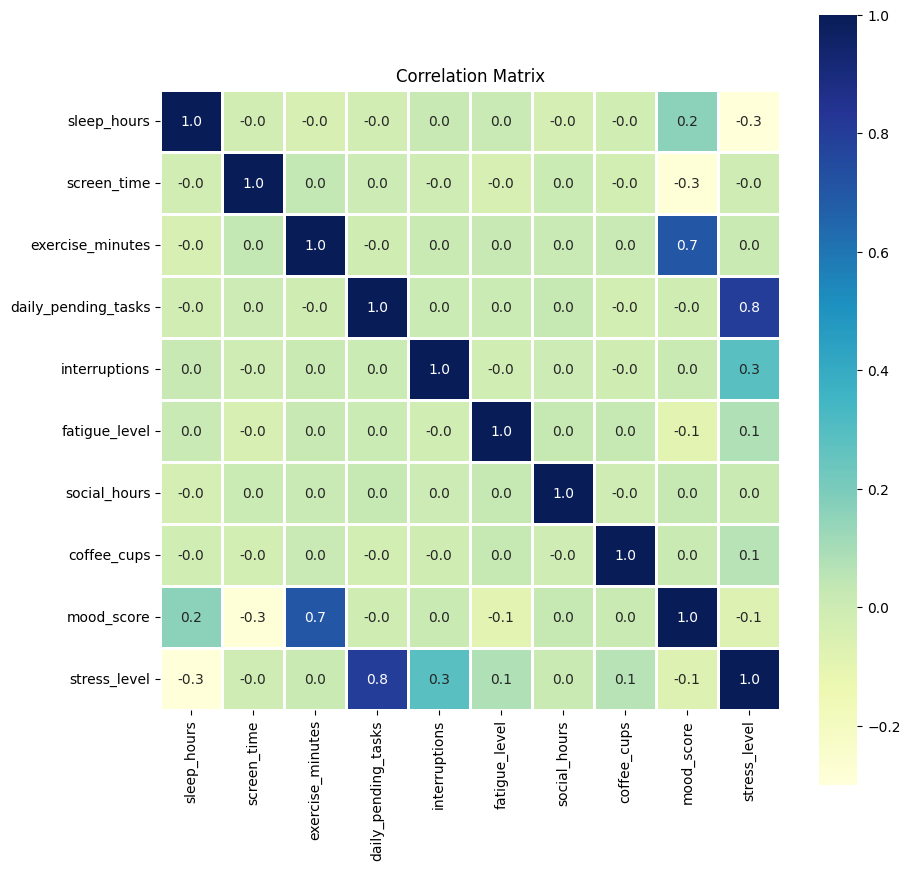

In [26]:
# set figure size
plt.figure(figsize=(10, 10))

# Create a heatmap to visually show the correlation
sns.heatmap(
    corr,
    cmap="YlGnBu",
    square=True,
    linewidths=1,
    linecolor="white",
    annot=True,          # show numbers
    fmt=".1f"            # round to 1 decimal place
)
plt.title("Correlation Matrix")

# Save figure and show
plt.savefig('../charts/correlation_matrix_heatmap.png')
plt.show()

## Save the clean data to a new file

In [24]:
df.to_parquet("../data_files/mental_health_dataset_cleaned.parquet")